In [1]:
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import LearningCurveDisplay

In [2]:
housing = fetch_california_housing(as_frame=True)

X, y = housing.data, housing.target
y *= 100  # rescale the target in k$

regressor = DecisionTreeRegressor()

In [3]:
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

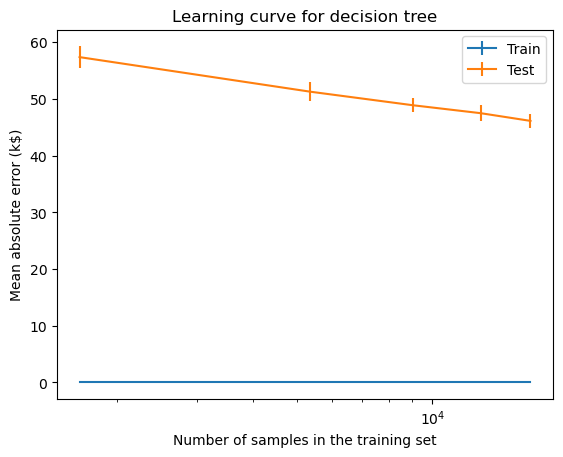

In [4]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)

display = LearningCurveDisplay.from_estimator(
    regressor,
    X,
    y,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",  # both train and test errors
    scoring="neg_mean_absolute_error",
    negate_score=True,  # to use when metric starts with "neg_"
    score_name="Mean absolute error (k$)",
    std_display_style="errorbar",
    n_jobs=2,
)
_ = display.ax_.set(xscale="log", title="Learning curve for decision tree")